# The SMS Spam Collection 

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains 5,574 messages in English language and tagged accordingly being a ham or spam.

## 1. Importing Libraries

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

 ## 2. Loading the Dataset

In [209]:
data = pd.read_csv('SMSSpamCollection', sep = "\t" , names = ["label", "message"])

In [210]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# 3. Exploratory Data Analysis


In [211]:
data.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [212]:
data.groupby("label").describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

# 4. Data Visualization


In [213]:
data["length"] = data["message"].apply(len)

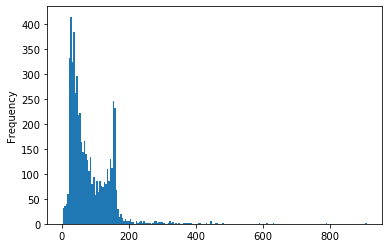

In [215]:
data["length"].plot.hist(bins=200)

In [216]:
data["length"].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [214]:
data.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [217]:
data[data["length"]==910]["message"].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

# 5. Text Pre-processing


In [218]:
def lowering_text(message):
    return message.lower()

def remove_whitespace(message):
    return " ".join(message.split())
        
def removing_punctuation(message):
    no_punctuation = []
    for words in message:
        if words not in string.punctuation:
            no_punctuation.append(words)
    return  "".join(no_punctuation)

def remove_stopwords(message): 
    stop_words = stopwords.words("english")
    word_tokens = word_tokenize(message) 
    filtered_text = [] 
    for words in word_tokens:
        if words not in stop_words:
            filtered_text.append(words)
    return filtered_text 


In [219]:
data["message"]=data["message"].apply(lowering_text)
data.head()

,label,message,length
0,ham,"go until jurong point, crazy.. available only ...",111
1,ham,ok lar... joking wif u oni...,29
2,spam,free entry in 2 a wkly comp to win fa cup fina...,155
3,ham,u dun say so early hor... u c already then say...,49
4,ham,"nah i don't think he goes to usf, he lives aro...",61


In [220]:
data["message"]=data["message"].apply(remove_whitespace)
data.head()

,label,message,length
0,ham,"go until jurong point, crazy.. available only ...",111
1,ham,ok lar... joking wif u oni...,29
2,spam,free entry in 2 a wkly comp to win fa cup fina...,155
3,ham,u dun say so early hor... u c already then say...,49
4,ham,"nah i don't think he goes to usf, he lives aro...",61


In [221]:
data["message"]=data["message"].apply(removing_punctuation)
data.head()

,label,message,length
0,ham,go until jurong point crazy available only in ...,111
1,ham,ok lar joking wif u oni,29
2,spam,free entry in 2 a wkly comp to win fa cup fina...,155
3,ham,u dun say so early hor u c already then say,49
4,ham,nah i dont think he goes to usf he lives aroun...,61


In [222]:
data["message"]=data["message"].apply(remove_stopwords)
data.head()

,label,message,length
0,ham,"[go, jurong, point, crazy, available, bugis, n...",111
1,ham,"[ok, lar, joking, wif, u, oni]",29
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",155
3,ham,"[u, dun, say, early, hor, u, c, already, say]",49
4,ham,"[nah, dont, think, goes, usf, lives, around, t...",61


In [223]:
stemmer = PorterStemmer()
def stemSentence(message):
    stem_words =[]
    for words in message:
        stem_words.append(stemmer.stem(words))
    return " ".join(stem_words)    

In [224]:
data["message"]=data["message"].apply(stemSentence)
data.head()

,label,message,length
0,ham,go jurong point crazi avail bugi n great world...,111
1,ham,ok lar joke wif u oni,29
2,spam,free entri 2 wkli comp win fa cup final tkt 21...,155
3,ham,u dun say earli hor u c alreadi say,49
4,ham,nah dont think goe usf live around though,61


# 6. Vectorization Using CountVectorizer

In [225]:
transformer_one = CountVectorizer().fit(data["message"])

In [226]:
message_transform = transformer_one.transform(data["message"])

In [227]:
message_transform

<5572x8092 sparse matrix of type '<class 'numpy.int64'>'
	with 47281 stored elements in Compressed Sparse Row format>

# 7. Training a model

In [228]:
message_train, message_test, spam_nospam_train, spam_nospam_test = train_test_split(message_transform, 
                                                        data["label"], test_size=0.3, random_state=101)

In [229]:
Naive_Bayes=MultinomialNB()

In [230]:
Naive_Bayes.fit(message_train,spam_nospam_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [231]:
prediction = Naive_Bayes.predict(message_test)

# 8. Model Evaluation


In [232]:
print("classification Report : \n" ,classification_report(spam_nospam_test,prediction))
print()
print(" Confusion Matrix :\n" ,confusion_matrix(spam_nospam_test,prediction))
print()
print("Accuracy Score :\n" ,accuracy_score(spam_nospam_test,prediction))

classification Report : 
               precision    recall  f1-score   support

         ham       0.99      0.98      0.99      1475
        spam       0.88      0.91      0.90       197

    accuracy                           0.97      1672
   macro avg       0.93      0.95      0.94      1672
weighted avg       0.98      0.97      0.98      1672


 Confusion Matrix :
 [[1450   25]
 [  17  180]]

Accuracy Score :
 0.9748803827751196


# 9. Vectorization Using TfidfVectorizer

In [233]:
transform_two = TfidfVectorizer(ngram_range=(1, 2), max_features=1000)

In [234]:
message_transform_two = transform_two.fit_transform(data["message"])

In [235]:
message_transform_two 

<5572x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 35399 stored elements in Compressed Sparse Row format>

# 10. Training a model

In [236]:
message_train, message_test, spam_nospam_train, spam_nospam_test = train_test_split(message_transform_two, 
                                                        data["label"], test_size=0.3, random_state=101)

In [237]:
Naive_Bayes=MultinomialNB()

In [238]:
Naive_Bayes.fit(message_train,spam_nospam_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [239]:
prediction = Naive_Bayes.predict(message_test)

# 11. Model Evaluation

In [242]:
print("classification Report :\n" ,classification_report(spam_nospam_test,prediction))
print()
print(" Confusion Matrix :\n" ,confusion_matrix(spam_nospam_test,prediction))
print()
print("Accuracy Score :\n" ,accuracy_score(spam_nospam_test,prediction))

classification Report :
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1475
        spam       0.98      0.84      0.90       197

    accuracy                           0.98      1672
   macro avg       0.98      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672


 Confusion Matrix :
 [[1472    3]
 [  32  165]]

Accuracy Score :
 0.979066985645933
